<b>CÁLCULO NUMÉRICO DO MODELO BIOCINÉTICO DO IODO</b>

Já vimos que as equações diferenciais que definem a biocinética do Iodo são dadas por:

$\displaystyle
\begin{equation}
\begin{cases}
\frac{\mathrm{d} A(t)}{\mathrm{d} t} & = & -\lambda_I \cdot A(t) - \lambda_{AB} \cdot A(t) -\lambda_{AD}\cdot A(t) + \lambda_{CA}\cdot C(t) \\
\frac{\mathrm{d} B(t)}{\mathrm{d} t}  & = & -\lambda_I \cdot B(t) - \lambda_{BC} \cdot B(t)+ \lambda_{AB}\cdot A(t) \\
\frac{\mathrm{d} C(t)}{\mathrm{d} t}  & = & -\lambda_I \cdot C(t) - \lambda_{CA} \cdot C(t) - \lambda_{CF} \cdot C(t)+ \lambda_{BC}\cdot B(t) \\
\frac{\mathrm{d} D(t)}{\mathrm{d} t}   & = & -\lambda_I \cdot D(t) + \lambda_{AD}\cdot A(t) \\
\frac{\mathrm{d} F(t)}{\mathrm{d} t}   & = & -\lambda_I \cdot F(t) + \lambda_{CF}\cdot C(t) \\
\end{cases}
\end{equation}$

Para resolvermos esta equação, vamos utilizar um método numérico iterativo de 1ª ordem considerando que:

$\displaystyle \frac{\mathrm{d} f(t_0+dt)}{\mathrm{d} t}=f(t_0)+\frac{\mathrm{d} f(t_0)}{\mathrm{d} t}dt$

Podemos construir um conjunto de equações iterativamente:

$\displaystyle
\begin{equation}
\begin{cases}
A_{i+1}=A_i +(\lambda_I \cdot A_i - \lambda_{AB} \cdot A_i -\lambda_{AD}\cdot A_i + \lambda_{CA}\cdot C_i)\cdot dt  \\
B_{i+1}=B_i +(-\lambda_I \cdot B_i - \lambda_{BC} \cdot B_i+ \lambda_{AB}\cdot A_i)\cdot dt \\
C_{i+1}=C_i +(-\lambda_I \cdot C_i - \lambda_{CA} \cdot C_i - \lambda_{CF} \cdot C_i+ \lambda_{BC}\cdot B_i )\cdot dt \\
D_{i+1}=D_i +(-\lambda_I \cdot D_i + \lambda_{AD}\cdot A_i)\cdot dt \\
F_{i+1}=F_i +(-\lambda_I \cdot F_i + \lambda_{CF}\cdot C_i)\cdot dt \\
\end{cases}
\end{equation}$

Escolhendo um "passo" relativamente pequeno teremos uma boa aproximação

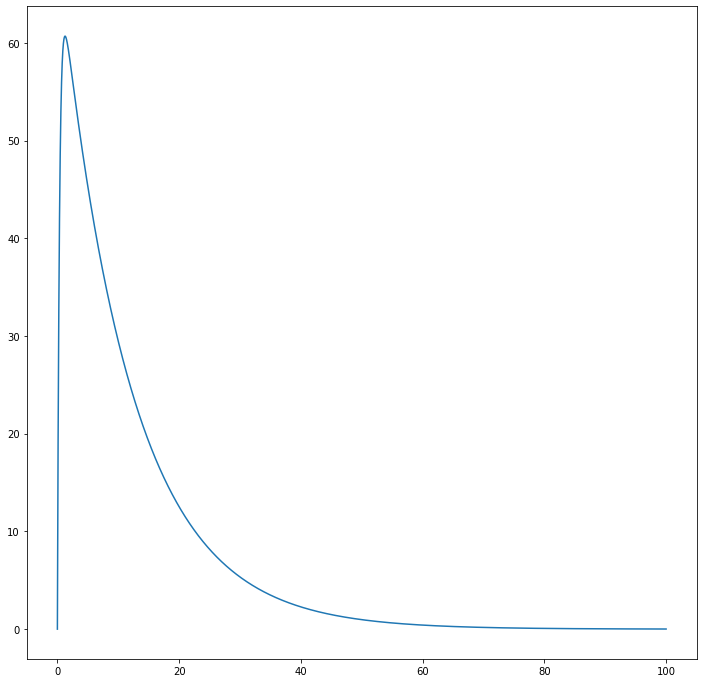

In [4]:
%matplotlib inline
import os
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

s1=100.
b1=0.
t1=0.
r1=0.
i1=0.

Sangue=[s1]
Bexiga=[b1]
Tiroide=[t1]
RDC=[r1]
Intestinos=[i1]

dt=0.001
N=100
T=int(N/dt)

LST=0.3*(np.log(2)/0.25)
LSB=0.7*(np.log(2)/0.25)
LTR=np.log(2)/80
LRS=0.8*(np.log(2)/12)
LRI=0.2*(np.log(2)/12)
LN=np.log(2)/8

for i in range (1,T):
    s1=s1+(-(LN+LST+LSB)*s1+LRS*r1)*dt
    t1=t1+(-(LN+LTR)*t1+LST*s1)*dt
    b1=b1+(-LN*b1+LSB*s1)*dt
    i1=i1+(-LN*i1+LRI*r1)*dt
    r1=r1+(-(LN+LRI+LRS)*r1+LTR*t1)*dt
    
    Sangue.append(s1)
    Bexiga.append(b1)
    Tiroide.append(t1)
    RDC.append(r1)
    Intestinos.append(i1)
    
x1 = np.arange(0,100,0.001)
# print(total)
# plt.plot(x1, A)
fig, (ax1) = plt.subplots(1, sharex=True,figsize=(12, 12))
ax1.set_yscale('linear')
ax1.plot(x1, Tiroide)
# plt.plot(x2, res)
plt.show()

E assim conseguimos determinar a curva de actividade de Iodo-131 na tiróide!

In [5]:
Tiroide

[0.0,
 0.08293983742530393,
 0.16563462579521798,
 0.2480850665153168,
 0.33029185898564933,
 0.41225570060647293,
 0.49397728678397135,
 0.5754573109359559,
 0.6566964644975508,
 0.737695436926862,
 0.8184549157106299,
 0.8989755863698656,
 0.9792581324654718,
 1.0593032356038465,
 1.139111575442472,
 1.2186838296954867,
 1.2980206741392415,
 1.3771227826178407,
 1.4559908270486663,
 1.5346254774278871,
 1.6130274018359516,
 1.6911972664430655,
 1.7691357355146533,
 1.8468434714168052,
 1.9243211346217064,
 2.0015693837130533,
 2.0785888753914525,
 2.155380264479805,
 2.231944203928674,
 2.30828134482164,
 2.384392336380639,
 2.460277825971282,
 2.5359384591081673,
 2.6113748794601688,
 2.6865877288557156,
 2.7615776472880538,
 2.8363452729204934,
 2.91089124209164,
 2.985216189320613,
 3.059320747312247,
 3.1332055469622793,
 3.206871217362523,
 3.2803183858060248,
 3.3535476777922066,
 3.4265597170319957,
 3.4993551254529374,
 3.571934523204294,
 3.6442985286621297,
 3.7164477584343